## Synthetic Data illstration plots

In [1]:
## load the functions
%run -i framework.py
%run -i exp.py

In [2]:
objs = ['max', 'CES-2', 'square_root']
distributions = ["Exponential", "Pareto-1.5"] # toggle Pareto scale
# fixed parameters
n = 50
n_sample = 500
n_sets = 50  

### Dependency on eps

In [3]:
# Error plot
def err_plot(df, c, distribution, is_log):  
    fig, axes = plt.subplots(1, 3, figsize = (6.4*3, 4.8))
    for i, obj in enumerate(objs):
        current = df[(df['distribution'] == distribution) & (df['obj'] == obj)]
        cm, cdd, cuu = [], [], []
        for j in range(50):
            y = current[(current['c']) == c[j]]['ratio'].values
            ci = stats.t.interval(0.8, len(y)-1, loc = np.mean(y), scale = stats.sem(y))
            cm.append(np.mean(y))
            cdd.append(ci[0])
            cuu.append(ci[1])
        if is_log == 1:
            axes[i].set_xscale('log') 
        axes[i].plot(c, cm, '.-')
        axes[i].grid()
        axes[i].hlines(y=1.0,xmin=np.min(c),xmax = np.max(c),color='red',linestyle='dotted')
        axes[i].fill_between(c, cdd, cuu, alpha=0.3, edgecolor='#089FFF', facecolor='#089FFF')
        axes[i].set_title(obj, fontsize= 16)
        axes[i].set_xlabel("$\epsilon*k$", fontsize= 16)
        axes[i].set_ylabel("$v(S)/u(S)$", fontsize=16)
        axes[i].set_ylim((0.5, 1.5))

In [4]:
# Dependency on eps - exponential case
c = np.round(np.logspace(-1,0.96,50),4)
create_output()
for k in range(1,21):
    set_items = get_sets(n, k, n_sets)
    eps = [e for e in c / k if e<1]
    for obj in objs:
        run_comparison(n, k, eps, n_sample, 'Exponential', obj, n_sets, set_items) 
    # toggle distributions 
    # run_comparison(n, k, eps, n_sample, 'Pareto-1.5', obj, n_sets, set_items) 

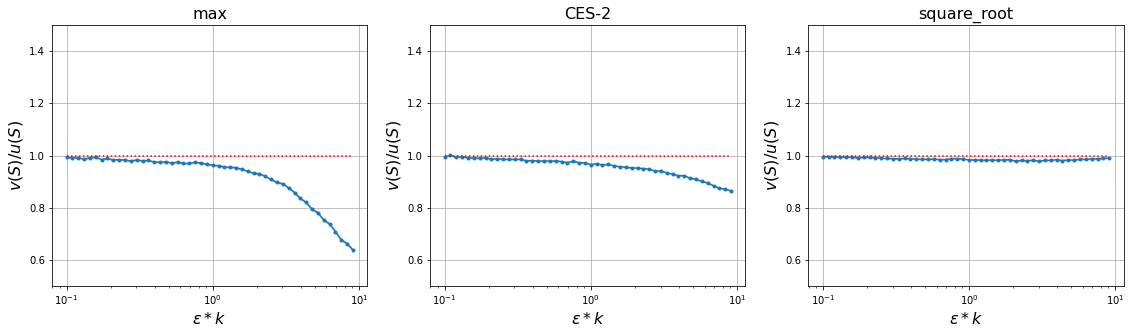

In [5]:
# sample results for exponential distribution
df = pd.read_csv('./res_comp.csv')
err_plot(df, c, 'Exponential', 1) 

### Comparison with TS method

In [6]:
def bar_plot(objs):
    df = pd.read_csv('./res_score.csv')
    fig, axes = plt.subplots(1, 2, figsize = (6.4*2, 4.8))
    for i, d in enumerate(distributions):  
        current = df[(df['distribution'] == d)]
        x_axis = np.arange(len(objs))
        
        # calculate means and stds
        TS_mean = current.groupby(['obj'])['ratio_TS'].mean()
        EB_mean = current.groupby(['obj'])['ratio_EB'].mean()     
        TS_std = current.groupby(['obj'])['ratio_TS'].std()
        EB_std = current.groupby(['obj'])['ratio_EB'].std()  
        
        axes[i].bar(x_axis -0.15, TS_mean, yerr= TS_std, capsize=5, width=0.3, label = 'Test Score', alpha= 0.5)
        axes[i].bar(x_axis +0.15, EB_mean, yerr= EB_std, capsize=5, width=0.3, label = 'Our method', alpha= 0.5)
        # add legends
        axes[i].legend(fontsize=14,loc='upper left')
        axes[i].grid()
        # set xticks and labels
        axes[i].set_xticks(x_axis)
        axes[i].set_xticklabels(objs, fontsize= 15)
        axes[i].set_xlabel("objectives", fontsize= 15)
        axes[i].set_ylabel("$v(S)/u(S)$", fontsize= 15)
        axes[i].set_ylim((0, 2)) 

In [7]:
create_output_comp()
c = 0.1
for k in range(1,21):
    set_items = get_sets(n, k, n_sets) 
    for obj in objs:  
        run_comparison_TS(n, k, c/k, n_sample, 'Pareto-1.5', obj, n_sets, set_items)
        run_comparison_TS(n, k, c/k, n_sample, 'Exponential', obj, n_sets, set_items)

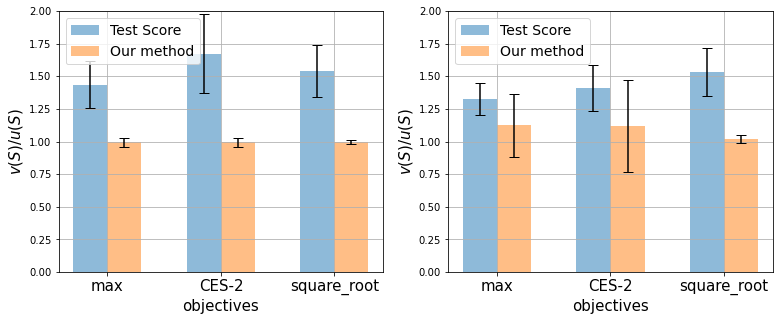

In [8]:
bar_plot(objs)  # toggle for other set size

### Aggregated results for our sketch

In [9]:
def box_plot(option):
    df = pd.read_csv('./res_score.csv')
    fig, axes = plt.subplots(1, 2, figsize = (6.4*2, 4.8))
    flierprops = dict(marker='o', markeredgecolor='lightgrey')
    df['obj'] = df['obj'].replace(['CES-2'], 'mb')
    for i, d in enumerate(distributions):  
        current = df[(df['distribution'] == d)]    
        current.boxplot(ax = axes[i], column = option, by = 'obj', flierprops = flierprops)
        axes[i].set_title('')
        axes[i].axhline(y=1.0, color='red',linestyle='dotted')
        axes[i].set_xlabel("objectives",fontsize= 15)
        axes[i].set_ylabel("$v(S)/u(S)$", fontsize= 15)
        axes[i].set_xticklabels(['max', 'CES-2', 'square_root'],fontsize= 15)
        axes[i].set_ylim((0, 2)) 
    fig.suptitle('')

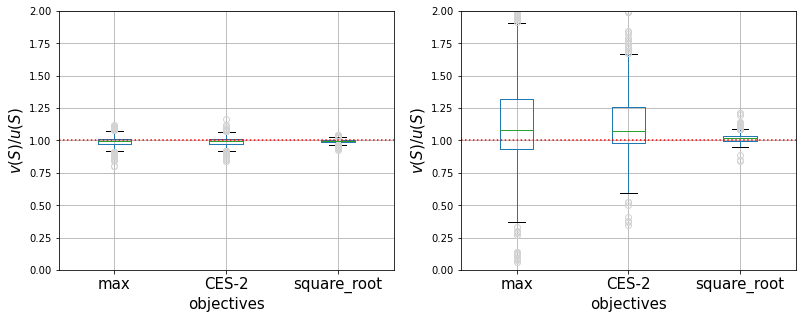

In [10]:
box_plot('ratio_EB')